# Imports

In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

# Read Data

In [2]:
train_df = pd.read_csv('./Data/test.csv')
test_df = pd.read_csv('./Data/train.csv')

# Explore Data

## General Information

In [3]:
print(f"Train Data Shape: {train_df.shape}\n")
print(train_df.info())

Train Data Shape: (3263, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


In [4]:
train_df.dropna().head(3)

,id,keyword,location,text
15,46,ablaze,London,Birmingham Wholesale Market is ablaze BBC News...
16,47,ablaze,Niall's place | SAF 12 SQUAD |,@sunkxssedharry will you wear shorts for race ...
17,51,ablaze,NIGERIA,#PreviouslyOnDoyinTv: Toke MakinwaÛªs marriag...


In [5]:
print(f"Test Data Shape: {test_df.shape}\n")
train_df.info()

Test Data Shape: (7613, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [6]:
test_df.dropna().head(3)

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1


## Distribution of Tweets by Target

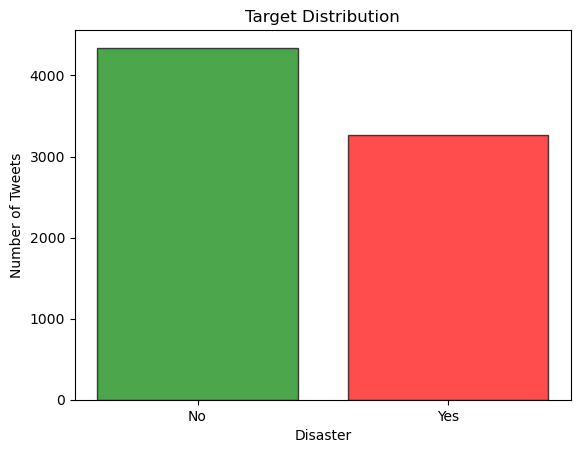

In [7]:
target_counts = test_df['target'].value_counts()

plt.bar(
    ['No', 'Yes'], 
    target_counts.values, 
    color=['green', 'red'],
    alpha=0.7, 
    edgecolor='black'
)

plt.title('Target Distribution')
plt.xlabel('Disaster')
plt.ylabel('Number of Tweets')
plt.show();

## Word Clouds by Target

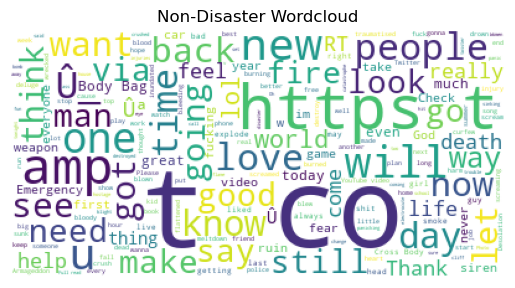

In [8]:
text = ' '.join(
    test_df[test_df['target'] == 0]['text'].dropna().astype(str)
)

plt.axis('off')
plt.title('Non-Disaster Wordcloud')
plt.imshow(WordCloud(background_color='white').generate(text))

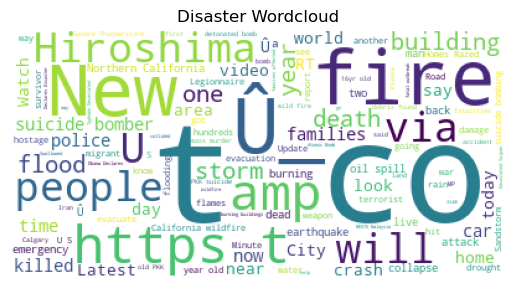

In [9]:
text = ' '.join(
    test_df[test_df['target'] == 1]['text'].dropna().astype(str)
)

plt.axis('off')
plt.title('Disaster Wordcloud')
plt.imshow(WordCloud(background_color='white').generate(text));

# Preprocess Data

In [10]:
translator = str.maketrans('', '', string.punctuation)

In [12]:
STOPWORDS = [word.translate(translator) for word in stopwords.words('english')]

# remove links? or keep in because it could indicate an actual disaster?
# like linking an official news source to a tweet about a disaster

train_df['text'] = train_df['text'].apply(lambda w: w.translate(translator))
test_df['text'] = test_df['text'].apply(lambda w: w.translate(translator))